In [1]:
import pandas as pd
import numpy as np
import gini

from util_data import DataSet

from sklearn.neighbors import KNeighborsRegressor

# added
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

# added more
from sklearn.neural_network import MLPRegressor

data = DataSet()

In [2]:
train = data.get_training_set()
test = data.get_testing_set()

In [3]:
X = train.drop(['id', 'target'], axis=1)
Y = train['target'].as_matrix()

In [127]:
cfl = MLPRegressor(hidden_layer_sizes=(100,),activation='logistic',solver='adam', max_iter=200, alpha=0.00005, learning_rate_init=0.0005)
# the idea here is to play with different parameter of MLPRegressor

In [128]:
X_train = X[:500000]
Y_train = Y[:500000]
X_test = X[-50000:]
Y_test = Y[-50000:]

In [129]:
cfl.fit(X_train, Y_train)

MLPRegressor(activation='logistic', alpha=5e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.0005, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Gini: 0.111, Max. Gini: 0.482, Normalized Gini: 0.231


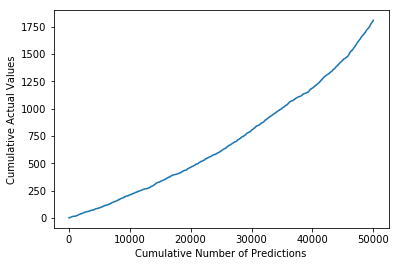

In [130]:
Y_pred = cfl.predict(X_test)
gini.gini_visualization(Y_test, Y_pred, True)